In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 55)
from matplotlib import pyplot as plt
import tracemalloc
import random
import scipy

<H3>Ćwiczenie zaliczeniowe<H3>

Celem ćwiczenia jest:
- przećwiczenie wiedzy o klasyfikatorach

Zadanie:

Część 1:
- pobierz bazę danych covertype (https://archive.ics.uci.edu/ml/datasets/Covertype)  
należy wykorzystać funkcję: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_covtype.html
- zwizualizuj dane przy użyciu TSNE
- napisz własna implementację klasyfikatora kNN
- naucz klasyfikator kNN
- naucz KNeighborsClassifier ze scikit-learn
- przeanalizuj i porównaj wyniki klasyfikatorów (confusion matrix, wykres k vs accuracy)
- napisz własną implementację klasyfikatora kNM
- naucz klasyfikator kNM
- porównaj accuracy własnego kNM z obiema wersjami kNN
- porównaj zużycie pamięci obu typów klasyfikacji

Część 2:
- wykorzystując bazę danych GTSRB zbuduj własną reprezentację danych o znakach (własny wektor cech, minimum 5 cech)
- zwizualizuj dane przy użyciu TSNE
- w oparciu o stworzony zestaw cech porównaj klasyfikatory z części 1

<H3>Część 1<H3>

In [2]:
dataset = datasets.fetch_covtype(return_X_y = True)
features, target = datasets.fetch_covtype(return_X_y = True)

In [3]:
features_df = pd.DataFrame(data = features, index = target)
features_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
5,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [5]:
features_droped = features_df.drop([i for i in range(10, 54)], axis=1)
A = features_droped[:5000]
B = features_droped[5000:20000]

In [6]:
features_droped

,0,1,2,3,4,5,6,7,8,9
5,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0
5,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0
2,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0
5,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0
...,...,...,...,...,...,...,...,...,...,...
3,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0
3,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0
3,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0
3,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0


In [7]:
scaler = StandardScaler()
A = scaler.fit_transform(A)

In [8]:
A

array([[ 1.46471134e-02, -9.52803948e-01, -1.55323806e+00, ...,
         6.54715715e-01,  3.40156162e-01,  3.59472542e+00],
       [-7.64411643e-04, -9.07228152e-01, -1.65963151e+00, ...,
         7.74007980e-01,  3.99353563e-01,  3.55395870e+00],
       [ 5.48913315e-01, -1.50669936e-01, -9.14877323e-01, ...,
         8.93300245e-01,  8.36340887e-02,  3.47544503e+00],
       ...,
       [ 1.67138606e+00, -9.43688789e-01,  3.61844142e-01, ...,
        -1.01537600e+00, -8.43791867e-01,  1.72549597e+00],
       [ 9.98416130e-01, -1.16245261e+00,  7.87417964e-01, ...,
        -1.49254506e+00, -5.87269794e-01,  1.55789947e+00],
       [ 1.11400257e+00, -1.87130573e-01, -9.14877323e-01, ...,
         8.13772068e-01,  4.41691545e-02, -1.97334160e-01]])

In [9]:
%%time
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(A)
plt.rcParams['figure.figsize'] = (10, 10)

Wall time: 43 s


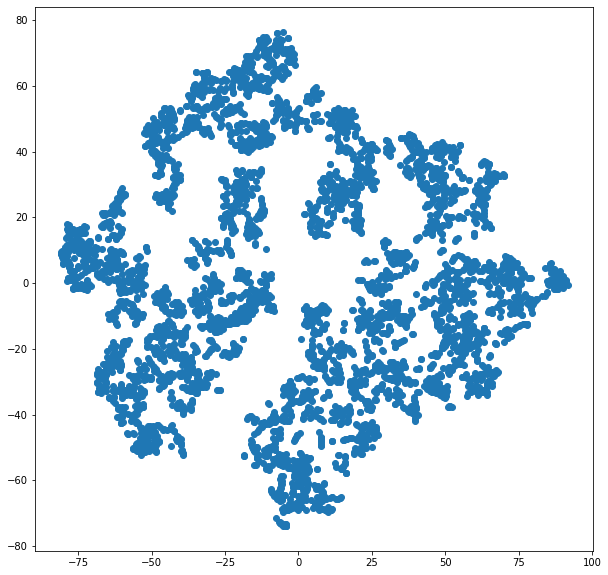

In [10]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

In [11]:
features_droped[:5000].index.unique()

Int64Index([5, 2, 1, 7, 3, 6, 4], dtype='int64')

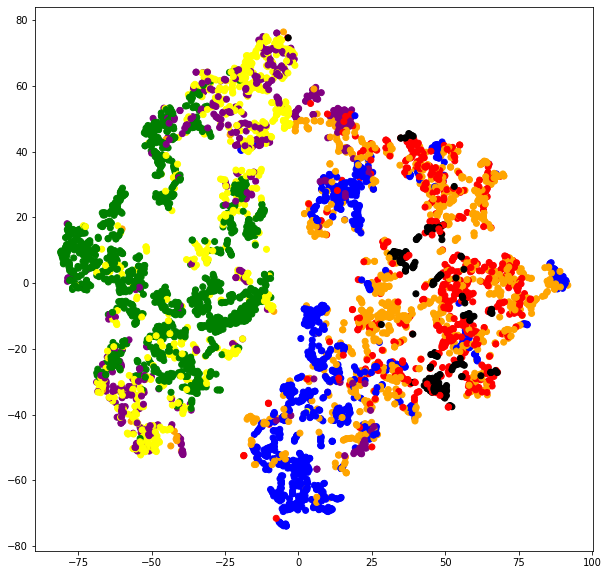

In [12]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=features_droped[:5000].index.map({ 1: 'red', 2: 'orange', 3: 'yellow', 4: 'green', 5: 'blue', 6 : 'purple', 7 : 'black'}));

<H3>Część 1 - KNN<H3>

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from memory_profiler import memory_usage,profile

In [14]:
features_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
5,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
features_droped = features_df.drop([i for i in range(10, 54)], axis=1)
A = features_droped[:500]  #train
B = features_droped[500:1000] #test
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [16]:
B

,0,1,2,3,4,5,6,7,8,9
2,2617.0,15.0,14.0,30.0,0.0,1652.0,207.0,211.0,139.0,1383.0
2,2998.0,340.0,7.0,108.0,16.0,2978.0,205.0,230.0,163.0,6224.0
2,2962.0,276.0,7.0,497.0,47.0,3610.0,201.0,242.0,179.0,5658.0
2,2759.0,160.0,12.0,120.0,35.0,2782.0,233.0,242.0,139.0,2462.0
2,2646.0,9.0,33.0,60.0,9.0,1771.0,165.0,156.0,112.0,1518.0
...,...,...,...,...,...,...,...,...,...,...
1,2982.0,10.0,18.0,30.0,7.0,4562.0,197.0,200.0,136.0,2538.0
1,3032.0,339.0,14.0,95.0,23.0,4710.0,189.0,219.0,169.0,518.0
2,2896.0,72.0,16.0,319.0,44.0,3294.0,236.0,208.0,98.0,2726.0
1,2846.0,135.0,2.0,0.0,0.0,3056.0,222.0,238.0,152.0,2349.0


In [17]:
%%time
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(B)
plt.rcParams['figure.figsize'] = (10, 10)

Wall time: 2.79 s


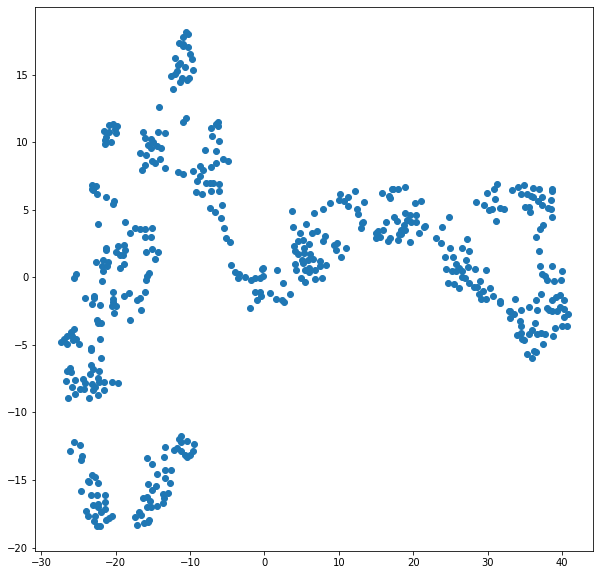

In [18]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

In [19]:
B.index.unique()

Int64Index([2, 1, 5], dtype='int64')

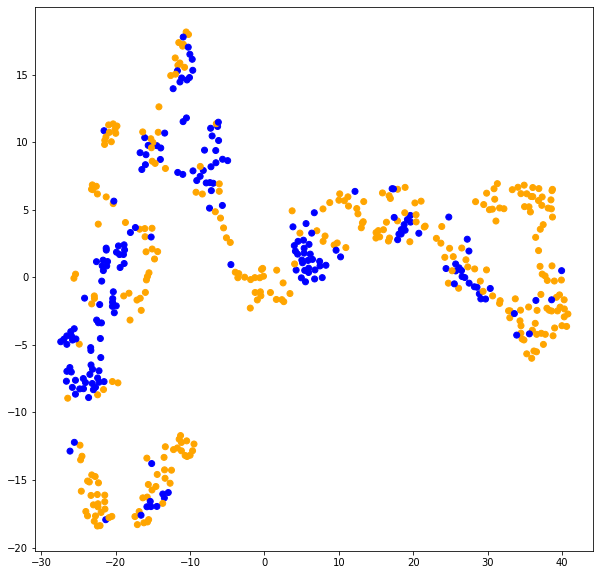

In [20]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=B.index.map({ 1: 'blue', 2: 'orange', 3: 'red', 4: 'green', 5: 'blue', 6 : 'grey', 7 : 'black'}));

In [21]:
def predict(train, test, n):
    distances = [(train.columns[k], (np.linalg.norm(train.iloc[:,k] - test))) for k in range(len(train.columns))]
    distances.sort(key=lambda tup: tup[1])
    neighbours = [distances[i][0] for i in range(n)]
    prediction = max(set(neighbours), key=neighbours.count)
    return(prediction)

In [22]:
def knn(train, test, n):
    TrainIndexNames, TestIndexNames = train.index.values, test.index.values
    A_scaled = min_max_scaler.fit_transform(train)
    B_scaled = min_max_scaler.fit_transform(test)
    train_df, test_df = pd.DataFrame(data = A_scaled, index = TrainIndexNames), pd.DataFrame(data = B_scaled)
    test_predict = [predict(train_df.T, test_df.T[k], n) for k in test_df.T.columns]
    return(test_predict, TestIndexNames)

In [23]:
%load_ext memory_profiler

In [24]:
def knn_descr():
    prediction, test_labels = knn(A, B, 1) #n
    print(prediction[:10])
    print(list(test_labels[:10]))
    display(accuracy_score(test_labels, prediction, normalize=True))
    display(confusion_matrix(test_labels, prediction))

In [25]:
def knn_descr_scipy():
    knn = KNeighborsClassifier(n_neighbors=1) #n
    knn.fit(A, A.index.values)
    knn_pred = knn.predict(B)
    accuracy_score(B.index.values, knn_pred)
    display(accuracy_score(B.index.values, knn_pred))
    display(confusion_matrix(B.index.values, knn_pred))

In [26]:
%%time
%memit knn_descr_scipy()

0.402

array([[ 43,  45,   0],
       [127, 158,  18],
       [ 64,  45,   0]], dtype=int64)

0.402

array([[ 43,  45,   0],
       [127, 158,  18],
       [ 64,  45,   0]], dtype=int64)

0.402

array([[ 43,  45,   0],
       [127, 158,  18],
       [ 64,  45,   0]], dtype=int64)

peak memory: 727.54 MiB, increment: 0.14 MiB
Wall time: 2.19 s


In [27]:
%%time
knn_descr()
%memit knn_descr()

[2, 1, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 1, 2, 2]


0.488

array([[ 55,  33,   0],
       [102, 189,  12],
       [ 56,  53,   0]], dtype=int64)

[2, 1, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 1, 2, 2]


0.488

array([[ 55,  33,   0],
       [102, 189,  12],
       [ 56,  53,   0]], dtype=int64)

peak memory: 727.73 MiB, increment: 0.00 MiB
Wall time: 2min 7s


 <H3>Część 1 - NM<H3>

In [28]:
features_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
5,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
A = features_droped[:500]  #train
B = features_droped[500:1000] #test

In [30]:
A

,0,1,2,3,4,5,6,7,8,9
5,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0
5,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0
2,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0
5,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0
...,...,...,...,...,...,...,...,...,...,...
2,2909.0,72.0,5.0,324.0,5.0,4554.0,226.0,230.0,138.0,5006.0
2,2909.0,0.0,3.0,350.0,5.0,4582.0,215.0,233.0,156.0,4985.0
2,2900.0,180.0,3.0,300.0,-2.0,4725.0,220.0,241.0,156.0,4880.0
2,2867.0,143.0,12.0,437.0,114.0,3363.0,237.0,237.0,129.0,2963.0


In [31]:
pd.DataFrame(data = features_df.index.to_series(), index = target)

,0
5,5
5,5
2,2
2,2
5,5
...,...
3,3
3,3
3,3
3,3


In [104]:
df_1 = features_df.loc[1,:]
df_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
1,2699.0,347.0,3.0,0.0,0.0,2096.0,213.0,234.0,159.0,6853.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2739.0,323.0,25.0,85.0,43.0,3118.0,149.0,205.0,192.0,6219.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2696.0,72.0,2.0,30.0,0.0,3271.0,222.0,234.0,149.0,6071.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2722.0,315.0,24.0,30.0,19.0,3216.0,148.0,212.0,200.0,6132.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2919.0,13.0,13.0,90.0,6.0,5321.0,207.0,214.0,142.0,4060.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,2826.0,72.0,14.0,67.0,13.0,2984.0,235.0,213.0,106.0,2082.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2820.0,69.0,14.0,42.0,7.0,2954.0,234.0,211.0,106.0,2065.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2812.0,67.0,16.0,30.0,0.0,2925.0,234.0,206.0,99.0,2047.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2832.0,45.0,17.0,85.0,19.0,2989.0,222.0,200.0,106.0,2058.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
def NM():
    df_1 = features_df.loc[1,:]
    df_2 = features_df.loc[2,:]
    df_3 = features_df.loc[3,:]
    df_4 = features_df.loc[4,:]
    df_5 = features_df.loc[5,:]
    df_6 = features_df.loc[6,:]
    df_7 = features_df.loc[7,:]
    
    df_1_mean = df_1.mean(axis=0)
    df_2_mean = df_2.mean(axis=0)
    df_3_mean = df_3.mean(axis=0)
    df_4_mean = df_4.mean(axis=0)
    df_5_mean = df_5.mean(axis=0)
    df_6_mean = df_6.mean(axis=0)
    df_7_mean = df_7.mean(axis=0)
    
    frames = [df_1_mean,df_2_mean,df_3_mean,df_4_mean,df_5_mean,df_6_mean,df_7_mean]
    meansy = pd.concat(frames, axis=1, join='outer', ignore_index=False)
    meansy = meansy.transpose()

    
    meansy_dropped =  meansy.iloc[:,[0,1,2,3,4,5,6,7,8,9]] #bo 10 cech ma A,B
    distanceNM = scipy.spatial.distance.cdist(meansy_dropped, B, metric='euclidean')
    Dist_df = pd.DataFrame(data = distanceNM)
    dist_df_min = pd.DataFrame(data = Dist_df.idxmin(axis=0, skipna=True))
    dist_z_bledem = dist_df_min.values
    dist = ( dist_z_bledem +1)
    Truth = pd.DataFrame(data = B.index.to_series())
    display(accuracy_score(Truth.values, dist, normalize=True))
    display(confusion_matrix(Truth.values, dist))

In [33]:
NM()

0.152

array([[  4,  19,   1,   7,   1,  56],
       [ 26,  58,  16,  53,  25, 125],
       [  0,   0,   0,   0,   0,   0],
       [  2,  33,   0,  14,   0,  60],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0]], dtype=int64)

In [34]:
%%time
NM()
%memit NM()

0.152

array([[  4,  19,   1,   7,   1,  56],
       [ 26,  58,  16,  53,  25, 125],
       [  0,   0,   0,   0,   0,   0],
       [  2,  33,   0,  14,   0,  60],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0]], dtype=int64)

0.152

array([[  4,  19,   1,   7,   1,  56],
       [ 26,  58,  16,  53,  25, 125],
       [  0,   0,   0,   0,   0,   0],
       [  2,  33,   0,  14,   0,  60],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0]], dtype=int64)

peak memory: 980.29 MiB, increment: 243.17 MiB
Wall time: 1.56 s


In [35]:
%%time
%memit knn_descr() 

[2, 1, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 1, 2, 2]


0.488

array([[ 55,  33,   0],
       [102, 189,  12],
       [ 56,  53,   0]], dtype=int64)

peak memory: 737.12 MiB, increment: 0.00 MiB
Wall time: 1min 5s


In [36]:
%%time
%memit knn_descr_scipy()

0.402

array([[ 43,  45,   0],
       [127, 158,  18],
       [ 64,  45,   0]], dtype=int64)

0.402

array([[ 43,  45,   0],
       [127, 158,  18],
       [ 64,  45,   0]], dtype=int64)

0.402

array([[ 43,  45,   0],
       [127, 158,  18],
       [ 64,  45,   0]], dtype=int64)

peak memory: 737.12 MiB, increment: 0.00 MiB
Wall time: 1.92 s


 <H3>Część 1 - Podsumowanie<H3>
Algorytmy scipy są zdecydowanie szybsze(2s vs minuta), jednak dla niewielkich grup testowych, algorytm własny wydaje się bardziej dokładny.
Algorytm NM jest zdecydowniae szybszy, na poziomie scipy KNN, jednak jego precyzyjność jest bardzo nikła oraz posiada on najwyższe zużycie pamięci

<H3>Część 2<H3>

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import csv

# function for reading the images
# arguments: path to the traffic sign data, for example './GTSRB/Training'
# returns: list of images, list of corresponding labels 
def readTrafficSigns(rootpath):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels'''
    images = [] # images
    labels = [] # corresponding labels
    # loop over all 42 classes
    for c in range(0,43):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        next(gtReader) # skip header !!!!!!!!!!!!!!!!!!TUTAJ NALEŻY KONIECZKIE ZMIENIĆ ORYGINAŁ
        # loop over all images in current annotations file
        for row in gtReader:
            x1,y1,x2,y2 = map(int,row[3:7])
            images.append(np.array(plt.imread(prefix + row[0]))[y1:y2,x1:x2]) # the 1th column is the filename
            labels.append(int(row[7])) # the 8th column is the label# TU ZMIENIĆ ODROBINKĘ
        gtFile.close()
    return np.array(images), np.array(labels)# I TU JESZCZE TROCHĘ

In [39]:
path = r"C:\Users\sticz\Desktop\Magisterka sezon drugi\Podstawy Uczenia Maszynowego\PUM-master\Laboratorium 1\GTSRB\Final_Training\Images"
images, labels = readTrafficSigns(path)

In [40]:
class_names=["zakazu", "ostrzegawcze", "informacyjne", "nakazu"]
sign_groups = [0,0,0,0,0,0,0,0,0,0,0,1,2,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,3,3,3,3,3,3,3,3,0,0]
labels_groups = np.array([sign_groups[cls] for cls in labels])

In [119]:
lg = pd.DataFrame(data =labels_groups)
lg

,0
0,0
1,0
2,0
3,0
4,0
...,...
39204,0
39205,0
39206,0
39207,0


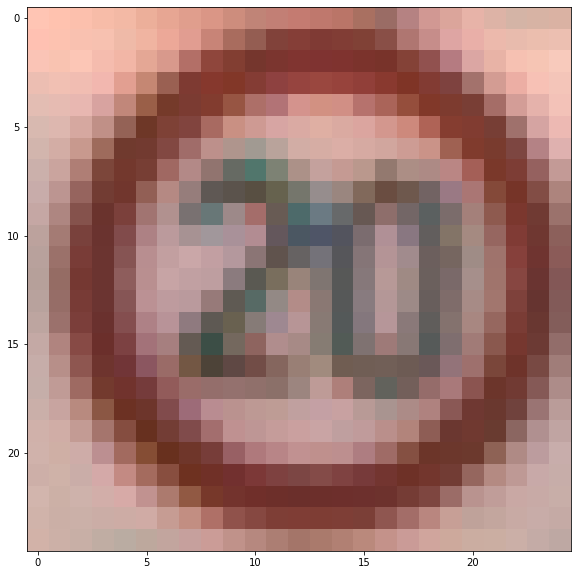

In [41]:
plt.figure()
plt.imshow(images[100])
plt.show()

In [42]:
img=images[100]
features=np.array([np.sum(img[:,:,0]),np.sum(img[:,:,1]),np.sum(img[:,:,2])])
features=features/np.sum(features)
features

array([0.41163983, 0.30225772, 0.28610245])

In [43]:
from sklearn.model_selection import train_test_split
training_set, test_set, training_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=3)

In [44]:
def convertToRelativeRGB(arr):
    result = [np.array([np.sum(img[:,:,0]),np.sum(img[:,:,1]),np.sum(img[:,:,2])]) for img in arr ]
    result = result/np.sum(result,axis=1)[:,None]
    return result

In [45]:
image_features = convertToRelativeRGB(images)
training_vec = convertToRelativeRGB(training_set)
test_vec = convertToRelativeRGB(test_set)

In [46]:
print(np.shape(training_vec))
print(np.shape(test_vec))

(31367, 3)
(7842, 3)


In [125]:
training_df = pd.DataFrame(data = training_vec,index = training_labels)

In [126]:
training_df[3] = training_df[0] / ( training_df[1]) 
training_df[4] = training_df[1] / ( training_df[2]) 

In [127]:
training_df

,0,1,2,3,4
5,0.381992,0.307066,0.310942,1.244005,0.987536
25,0.377253,0.320273,0.302474,1.177913,1.058841
35,0.261371,0.318120,0.420509,0.821610,0.756514
13,0.334737,0.316305,0.348958,1.058275,0.906427
15,0.377899,0.315657,0.306444,1.197181,1.030065
...,...,...,...,...,...
42,0.293942,0.311669,0.394390,0.943122,0.790256
18,0.390866,0.308146,0.300988,1.268442,1.023784
7,0.335223,0.304185,0.360593,1.102037,0.843568
1,0.347016,0.304401,0.348583,1.139997,0.873251


In [122]:
test_df = pd.DataFrame(data = test_vec, index = test_labels)

In [123]:
test_df[3] = test_df[0] / ( test_df[1]) 
test_df[4] = test_df[1] / ( test_df[2]) 

In [170]:
image_features_df = pd.DataFrame(data = image_features, index = labels)

In [171]:
image_features_df[3] = image_features_df[0] / ( image_features_df[1]) 
image_features_df[4] = image_features_df[1] / ( image_features_df[2]) 

In [172]:
image_features_df

,0,1,2,3,4
0,0.388223,0.299714,0.312063,1.295310,0.960430
0,0.384023,0.302212,0.313765,1.270710,0.963178
0,0.381788,0.300540,0.317672,1.270343,0.946068
0,0.381825,0.304077,0.314098,1.255683,0.968096
0,0.395549,0.297565,0.306887,1.329287,0.969624
...,...,...,...,...,...
42,0.287313,0.321295,0.391392,0.894235,0.820902
42,0.287875,0.320836,0.391289,0.897264,0.819947
42,0.287277,0.320460,0.392263,0.896451,0.816952
42,0.287722,0.320912,0.391366,0.896578,0.819978


In [128]:
def knn_descr():
    prediction, test_labels = knn(training_df, test_df, 1) #n
    print(prediction[:10])
    print(list(test_labels[:10]))
    display(accuracy_score(test_labels, prediction, normalize=True))
    display(confusion_matrix(test_labels, prediction))

In [139]:
def knn_descr_scipy():
    knn = KNeighborsClassifier(n_neighbors=1) #n
    knn.fit(training_df, training_labels)
    knn_pred = knn.predict(test_df)
    accuracy_score(test_labels, knn_pred)
    display(accuracy_score(test_labels, knn_pred))
    display(confusion_matrix(test_labels, knn_pred))

In [140]:
%%time
%memit knn_descr_scipy()

0.19867380770211682

array([[ 2,  4,  3, ...,  0,  0,  0],
       [ 5, 72, 39, ...,  0,  1,  0],
       [ 2, 34, 73, ...,  0,  1,  0],
       ...,
       [ 0,  1,  0, ..., 17,  0,  1],
       [ 0,  1,  0, ...,  0, 11,  0],
       [ 0,  1,  0, ...,  0,  0, 11]], dtype=int64)

peak memory: 1215.25 MiB, increment: 1.20 MiB
Wall time: 1 s


In [97]:
#%%time
#%memit knn_descr()

In [185]:
def NM():
    meansy = []
    for i in range(0,42):
        df_x = image_features_df.loc[i,:]
        df_x_mean = df_x.mean(axis=0)
        meansy.append(df_x_mean)
        meansy_df = pd.DataFrame(data=meansy)
 

    #meansy = meansy.transpose()

    
    #meansy_dropped =  meansy_df.iloc[:,[0,1,2,3,4]] #bo 5 cech ma 
    distanceNM = scipy.spatial.distance.cdist(meansy_df, test_df, metric='euclidean')
    Dist_df = pd.DataFrame(data = distanceNM)
    dist_df_min = pd.DataFrame(data = Dist_df.idxmin(axis=0, skipna=True))
    dist_z_bledem = dist_df_min.values
    dist = ( dist_z_bledem +1)
    display(accuracy_score(test_labels, dist, normalize=True))
    display(confusion_matrix(test_labels, dist))

In [186]:
%%time
NM()
%memit NM()

0.04106095383830655

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  9,  2, ...,  0,  7,  3],
       [ 0, 14,  1, ...,  0,  0,  3],
       ...,
       [ 0,  0,  0, ..., 18, 14,  0],
       [ 0,  0,  0, ...,  0,  3,  8],
       [ 0,  0,  0, ...,  0, 15,  2]], dtype=int64)

0.04106095383830655

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  9,  2, ...,  0,  7,  3],
       [ 0, 14,  1, ...,  0,  0,  3],
       ...,
       [ 0,  0,  0, ..., 18, 14,  0],
       [ 0,  0,  0, ...,  0,  3,  8],
       [ 0,  0,  0, ...,  0, 15,  2]], dtype=int64)

0.04106095383830655

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  9,  2, ...,  0,  7,  3],
       [ 0, 14,  1, ...,  0,  0,  3],
       ...,
       [ 0,  0,  0, ..., 18, 14,  0],
       [ 0,  0,  0, ...,  0,  3,  8],
       [ 0,  0,  0, ...,  0, 15,  2]], dtype=int64)

peak memory: 1271.50 MiB, increment: 2.52 MiB
Wall time: 1.91 s


In [187]:
%%time
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(test_df,train_df)
plt.rcParams['figure.figsize'] = (10, 10)

Wall time: 1min 21s


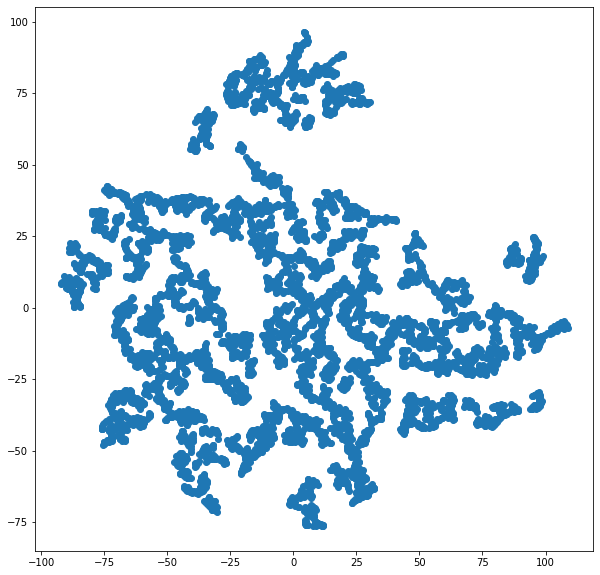

In [188]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);